In [1]:
# import modules 

import torch
import torch.nn as nn 
import torchvision as tv 
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

from tqdm import tqdm

import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_mnist = pd.read_csv('/content/drive/MyDrive/train_mnist.csv')

In [4]:
train_mnist

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
41995       0  ...         0         0         0         0         0   
41996       0  ...         0         0         0         0         0   
41997       0  ...         0         0         0         0         0   
41998       0  ...         0         0         0         0         0   
41999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
41995         0         0         0         0         0  
41996         0         0         0         0         0  
41997         0         0         0         0         0  
41998         0         0         0         0         0  
41999         0         0         0         0         0  

[42000 rows x 785 columns]

In [5]:
!pip3 install more_itertools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:


train_mnist_formed = []
for i, row in train_mnist.iterrows():
    row = row.tolist()
    label = row[0]
    image = row[1:]
    

    total_image = []
    batches_image = np.array_split(image , 28)
    
    for i in batches_image :
      total_image.append(i)

    
    
    total_image = np.expand_dims( total_image , axis = 0 )
    total_image = torch.FloatTensor(total_image)
    image_w_label = ( total_image , label )
    train_mnist_formed.append(image_w_label)
  # prefit dataframe to view ( image , label) 

In [7]:
ds_mnist = train_mnist_formed

In [8]:
ds_mnist[0][0].shape # image in (image , label) has size 28 x 28 pixels (now tensors) , and 1 colour


torch.Size([1, 28, 28])

In [ ]:
len(ds_mnist)

42000

In [ ]:
ds_mnist[0][0]

tensor([[[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 188., 255.,
           94.,   0.,   0.,   0.,   0.,   0.],
     

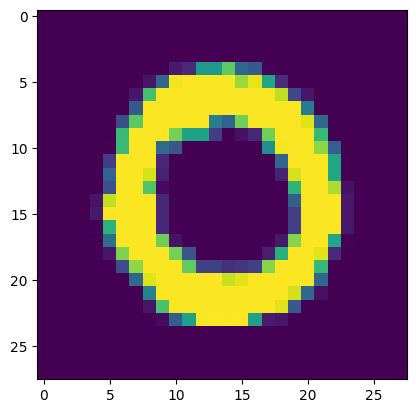

In [ ]:
plt.imshow( ds_mnist[1][0].squeeze() ) #squeeze to delete the colour dimension

In [33]:
#DataLoader

batch_size = 128

dataloader = torch.utils.data.DataLoader(ds_mnist ,
                                         batch_size = batch_size ,
                                         shuffle = True , 
                                         num_workers= 0 , 
                                         drop_last = True 
                                         )



Функция активации добавляет нелинейности

In [38]:
# torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)

class Neural_numbers(nn.Module):
  #Arch и ее блоки
  def __init__(self):
        
        super().__init__() 
        
        self.conv1= nn.Sequential( nn.Conv2d( 1 , 16 , kernel_size = 5 , stride = 1 , padding = 2 ),
                                  nn.BatchNorm2d(16) ,
                                  nn.ReLU() ,
                                  nn.MaxPool2d( (2,2) )


        )

        self.conv2 = nn.Sequential( 
                                
                                nn.Conv2d( 16 , 32 , 5 , 1 , 2 ) ,
                                nn.BatchNorm2d(32) , 
                                nn.ReLU() , 
                                nn.MaxPool2d( (2,2 ))

        )
        
        

        self.flat = nn.Flatten()
        self.linear1 = nn.Linear(32 * 7  * 7 , 100)
        self.linear2 = nn.Linear(100 , 100)
        self.linear3 = nn.Linear(100 , 10)
        

        self.act = nn.PReLU()
       
  def forward(self, x): 
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.flat(x)
    x = self.act(self.linear1(x))
    x = self.act( self.linear2(x))
    x =  self.linear3(x)
    return x 
        

        

In [39]:
model = Neural_numbers()

In [61]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW( model.parameters(), lr= 3e-4  , amsgrad = True )

In [17]:
def accuracy(pred , label) :
    
    answer = F.softmax(pred.detach()).numpy().argmax(1)  == label.numpy().argmax(1)
    
    return answer.mean()

In [50]:
for img , label in dataloader :
  print(img.shape)
  break  # see how the data in dataloader looks

torch.Size([128, 1, 28, 28])


In [62]:
epochs = 10 

for epoch in range(epochs):

  loss_val = 0 
  acc_val = 0 

  for img , label in (pbar := tqdm(dataloader)) :
    #opt z g 
    label = nn.functional.one_hot( label , 10 ).float() 
    pred = model(img) 

    loss = loss_fn(pred , label) 
    optimizer.zero_grad() 

    loss.backward() 

    loss_item = loss.item()
    loss_val += loss_item

    acc_current = accuracy(pred , label)
    acc_val  += acc_current
    optimizer.step() 

  
   
    pbar.set_description(f'loss : {loss_item:.4f}\taccuracy : {acc_current:.3f}')  
  print( f'epoch {epoch + 1 }' , f' loss_val : {loss_val / len(dataloader) }'
  , f'acc_val : {acc_val / len(dataloader)}')

  0%|          | 0/328 [00:00<?, ?it/s]<ipython-input-17-758b855bc9b3>:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answer = F.softmax(pred.detach()).numpy().argmax(1)  == label.numpy().argmax(1)
loss : 0.0199	accuracy : 0.992: 100%|██████████| 328/328 [00:30<00:00, 10.81it/s]


epoch 1  loss_val : 0.012950802185691938 acc_val : 0.9959508384146342


loss : 0.0241	accuracy : 0.977: 100%|██████████| 328/328 [00:30<00:00, 10.78it/s]


epoch 2  loss_val : 0.009636487924758623 acc_val : 0.9968083079268293


loss : 0.0169	accuracy : 0.984: 100%|██████████| 328/328 [00:30<00:00, 10.73it/s]


epoch 3  loss_val : 0.008513576269074181 acc_val : 0.9972608612804879


loss : 0.0098	accuracy : 0.992: 100%|██████████| 328/328 [00:30<00:00, 10.62it/s]


epoch 4  loss_val : 0.006942788513519989 acc_val : 0.9979992378048781


loss : 0.0012	accuracy : 1.000: 100%|██████████| 328/328 [00:31<00:00, 10.27it/s]


epoch 5  loss_val : 0.0065703454100269195 acc_val : 0.9978563262195121


loss : 0.0041	accuracy : 1.000: 100%|██████████| 328/328 [00:31<00:00, 10.55it/s]


epoch 6  loss_val : 0.0023479139849658212 acc_val : 0.9996903582317073


loss : 0.0005	accuracy : 1.000: 100%|██████████| 328/328 [00:30<00:00, 10.72it/s]


epoch 7  loss_val : 0.001694431444609175 acc_val : 0.9997141768292683


loss : 0.0002	accuracy : 1.000: 100%|██████████| 328/328 [00:30<00:00, 10.61it/s]


epoch 8  loss_val : 0.0007462851495003589 acc_val : 0.999976181402439


loss : 0.0003	accuracy : 1.000: 100%|██████████| 328/328 [00:30<00:00, 10.74it/s]


epoch 9  loss_val : 0.0005723253990259853 acc_val : 0.999976181402439


loss : 0.0001	accuracy : 1.000: 100%|██████████| 328/328 [00:30<00:00, 10.70it/s]

epoch 10  loss_val : 0.000358945507611413 acc_val : 0.999976181402439


In [63]:
test_mnist = pd.read_csv('/content/drive/MyDrive/test_mnist.csv')

In [64]:
test_mnist

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27995       0       0       0       0       0       0       0       0       0   
27996       0       0       0       0       0       0       0       0       0   
27997       0       0       0       0       0       0       0       0       0   
27998       0       0       0       0       0       0       0       0       0   
27999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
27995       0  ...         0         0         0         0         0   
27996       0  ...         0         0         0         0         0   
27997       0  ...         0         0         0         0         0   
27998       0  ...         0         0         0         0         0   
27999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
27995         0         0         0         0         0  
27996         0         0         0         0         0  
27997         0         0         0         0         0  
27998         0         0         0         0         0  
27999         0         0         0         0         0  

[28000 rows x 784 columns]

In [65]:
test_mnist_formed = []
for i, row in test_mnist.iterrows():
    row = row.tolist()
    
    
    

    total_image = []
    batches_image = np.array_split(row , 28)
    
    for i in batches_image :
      total_image.append(i)

    
    
    total_image = np.expand_dims( total_image , axis = 0 )
    total_image = torch.FloatTensor(total_image)
    
    test_mnist_formed.append(total_image)

In [66]:
test_dataloader = torch.utils.data.DataLoader( test_mnist_formed ,
                                         batch_size = 28 ,
                                         shuffle = False , 
                                         num_workers= 0 , 
                                         drop_last = False 
                                         )


In [67]:

list_of_predictions = []

for i in test_dataloader :
  
  
  
  
  nash_pred = model(i)
  

  prediction = F.softmax(nash_pred.detach()).numpy().argmax(1)
  
  for i in prediction :

  
    list_of_predictions.append(i)

  
  




<ipython-input-67-d2fdda41e4e9>:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prediction = F.softmax(nash_pred.detach()).numpy().argmax(1)


In [68]:
len(list_of_predictions)

28000

In [ ]:
list_of_predictions

In [70]:
list_of_indixes = [ i for i in range(1 , 28001)]

In [71]:
len(list_of_indixes)

28000

In [72]:
submission = pd.DataFrame({'ImageId' : list_of_indixes , 'Label' : list_of_predictions })

In [73]:
submission

ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      0
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]

In [74]:
submission.to_csv( 'Conv1.csv' , index= False )